In [243]:
!pip install tweepy

<center><h1> Data Wrangling and Analysis </h1></center>
<center><h3> A case study by Siddartha Thentu</h3></center>

<h1>Introduction</h1>

**What is this project about**
- In this project, we look at ways to gather data, supplement the incomplete data by wrangling the required data from the internet thorugh API, manually download available data files. After that, we assess the data for issues in it's quality and tidiness. Then, we clean the issues and save the clean file.

**Libraries Used**
- pandas : data manipulation
- numpy : numerical manipulation
- requests : downloading data from the internet
- re : extracting the regular expressions
- tweepy : downloading data through twitter API
- json : handling json format data
- timeit : calculate the time taken

**Steps Taken**
- Data gathering
- Data assesing
- Data cleaning
- Data analysis

**Case Study**
<br><br>
<a href='https://twitter.com/dog_rates'>WeRateDogs</a> is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage. In this case study, we currently have **two pieces of data/dataframes available with us**. Let's take a minute to explore them.
 <br>
 
 1. Through Udacity, we have access to a few tweet data provided by WeRateDogs. However, this data has only basic features like 'tweet_id','dog_name','retweet_id' etc. Some important features like the number of retweets and number of favorites (which show the popularity of the dog) were not provided. Luckily, with the given tweet_id's, we can wrangle this tweets from WeRateDog's archive and extract the required content.<br><br>
    **Name : twitter-archive-enhanced-2.csv** <br>
    **Source : <a href="https://www.udacity.com/">Udacity</a>**<br>
    **Access : manual download from website**
 <br><br>
 
 2. Each tweet in the twitter-archive-enhanced-2.csv is thought to have images of the dog. These images were fed into a Dog breed classifier model to identify the type and breed of dog. This was done by the Udacity team and the file was hosted on Udacity's server.<br><br>
    **Name : image-predictions.tsv** <br>
    **Source : <a href="https://www.udacity.com/">Udacity</a>**<br>
    **Access : Download the file from server through requests library**

**Importing the necessary libraries**

In [244]:
import pandas as pd
import tweepy
import re
import numpy as np
import requests
from timeit import default_timer as timer
import json

<h1>Data Wrangling/Gathering</h1>

**Let's load the manually downloaded file into the dataframe and take a peek into it**

In [245]:
#load the manually downloaded file into a pandas dataframe
given_tweet_data = pd.read_csv('data/twitter-archive-enhanced-2.csv')

In [246]:
#Let's take a look at the data
given_tweet_data.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


**Let's now setup our twitter API to extract the complete tweet contents based on available tweet_id's**

In [41]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN-HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [51]:
fails = {}

start = timer()

#For all the tweet_id's, from "given_tweet_data['tweet_id'].values" extract tweet data from twitter.
#Try catch block used because some tweets might have been deleted and cannot be accessed which should not stop our progress.

with open("tweets_json.txt","w+") as output:
    for idx,val in enumerate(given_tweet_data['tweet_id'].values):
        try:
            content = api.get_status(val) #extract tweet content
            json.dump(content._json,output) #dump content into a file called "tweets_json.txt" as new line for each tweet data
            output.write("\n") #insert a new line
            print("Succes. Remaining = ",total_tweets-idx-1) #Logger to keep track 
        
        except tweepy.TweepError as e: #catch exception
            fails[val] = e #load the tweet_id and error into a dictionary
            print("Error. Remaining = ",total_tweets-idx-1)
            pass
            
end = timer()

print("Time took = ",end-start," seconds")

Succes. Remaining =  2355
Succes. Remaining =  2354
Succes. Remaining =  2353
Succes. Remaining =  2352
Succes. Remaining =  2351
Succes. Remaining =  2350
Succes. Remaining =  2349
Succes. Remaining =  2348
Succes. Remaining =  2347
Succes. Remaining =  2346
Succes. Remaining =  2345
Succes. Remaining =  2344
Succes. Remaining =  2343
Succes. Remaining =  2342
Succes. Remaining =  2341
Succes. Remaining =  2340
Succes. Remaining =  2339
Succes. Remaining =  2338
Succes. Remaining =  2337
Error. Remaining =  2336
Succes. Remaining =  2335
Succes. Remaining =  2334
Succes. Remaining =  2333
Succes. Remaining =  2332
Succes. Remaining =  2331
Succes. Remaining =  2330
Succes. Remaining =  2329
Succes. Remaining =  2328
Succes. Remaining =  2327
Succes. Remaining =  2326
Succes. Remaining =  2325
Succes. Remaining =  2324
Succes. Remaining =  2323
Succes. Remaining =  2322
Succes. Remaining =  2321
Succes. Remaining =  2320
Succes. Remaining =  2319
Succes. Remaining =  2318
Succes. Remai

Succes. Remaining =  2039
Succes. Remaining =  2038
Succes. Remaining =  2037
Succes. Remaining =  2036
Succes. Remaining =  2035
Succes. Remaining =  2034
Succes. Remaining =  2033
Succes. Remaining =  2032
Succes. Remaining =  2031
Succes. Remaining =  2030
Succes. Remaining =  2029
Succes. Remaining =  2028
Succes. Remaining =  2027
Succes. Remaining =  2026
Succes. Remaining =  2025
Succes. Remaining =  2024
Succes. Remaining =  2023
Succes. Remaining =  2022
Succes. Remaining =  2021
Succes. Remaining =  2020
Succes. Remaining =  2019
Succes. Remaining =  2018
Succes. Remaining =  2017
Succes. Remaining =  2016
Succes. Remaining =  2015
Succes. Remaining =  2014
Succes. Remaining =  2013
Succes. Remaining =  2012
Succes. Remaining =  2011
Succes. Remaining =  2010
Succes. Remaining =  2009
Succes. Remaining =  2008
Succes. Remaining =  2007
Succes. Remaining =  2006
Succes. Remaining =  2005
Succes. Remaining =  2004
Succes. Remaining =  2003
Succes. Remaining =  2002
Succes. Rema

Succes. Remaining =  1723
Succes. Remaining =  1722
Succes. Remaining =  1721
Succes. Remaining =  1720
Succes. Remaining =  1719
Succes. Remaining =  1718
Succes. Remaining =  1717
Succes. Remaining =  1716
Succes. Remaining =  1715
Succes. Remaining =  1714
Succes. Remaining =  1713
Succes. Remaining =  1712
Succes. Remaining =  1711
Succes. Remaining =  1710
Succes. Remaining =  1709
Succes. Remaining =  1708
Succes. Remaining =  1707
Succes. Remaining =  1706
Succes. Remaining =  1705
Succes. Remaining =  1704
Succes. Remaining =  1703
Succes. Remaining =  1702
Succes. Remaining =  1701
Succes. Remaining =  1700
Succes. Remaining =  1699
Succes. Remaining =  1698
Succes. Remaining =  1697
Succes. Remaining =  1696
Succes. Remaining =  1695
Succes. Remaining =  1694
Succes. Remaining =  1693
Succes. Remaining =  1692
Succes. Remaining =  1691
Succes. Remaining =  1690
Succes. Remaining =  1689
Succes. Remaining =  1688
Succes. Remaining =  1687
Succes. Remaining =  1686
Succes. Rema

Succes. Remaining =  1406
Succes. Remaining =  1405
Succes. Remaining =  1404
Succes. Remaining =  1403
Succes. Remaining =  1402
Succes. Remaining =  1401
Succes. Remaining =  1400
Succes. Remaining =  1399
Succes. Remaining =  1398
Succes. Remaining =  1397
Succes. Remaining =  1396
Succes. Remaining =  1395
Succes. Remaining =  1394
Succes. Remaining =  1393
Succes. Remaining =  1392
Succes. Remaining =  1391
Succes. Remaining =  1390
Succes. Remaining =  1389
Succes. Remaining =  1388
Succes. Remaining =  1387
Succes. Remaining =  1386
Succes. Remaining =  1385
Succes. Remaining =  1384
Succes. Remaining =  1383
Succes. Remaining =  1382
Succes. Remaining =  1381
Succes. Remaining =  1380
Succes. Remaining =  1379
Succes. Remaining =  1378
Succes. Remaining =  1377
Succes. Remaining =  1376
Succes. Remaining =  1375
Succes. Remaining =  1374
Succes. Remaining =  1373
Succes. Remaining =  1372
Succes. Remaining =  1371
Succes. Remaining =  1370
Succes. Remaining =  1369
Succes. Rema

Rate limit reached. Sleeping for: 742


Succes. Remaining =  1338
Succes. Remaining =  1337
Succes. Remaining =  1336
Succes. Remaining =  1335
Succes. Remaining =  1334
Succes. Remaining =  1333
Succes. Remaining =  1332
Succes. Remaining =  1331
Succes. Remaining =  1330
Succes. Remaining =  1329
Succes. Remaining =  1328
Succes. Remaining =  1327
Succes. Remaining =  1326
Succes. Remaining =  1325
Succes. Remaining =  1324
Succes. Remaining =  1323
Succes. Remaining =  1322
Succes. Remaining =  1321
Succes. Remaining =  1320
Succes. Remaining =  1319
Succes. Remaining =  1318
Succes. Remaining =  1317
Succes. Remaining =  1316
Succes. Remaining =  1315
Succes. Remaining =  1314
Succes. Remaining =  1313
Succes. Remaining =  1312
Succes. Remaining =  1311
Succes. Remaining =  1310
Succes. Remaining =  1309
Succes. Remaining =  1308
Succes. Remaining =  1307
Succes. Remaining =  1306
Succes. Remaining =  1305
Succes. Remaining =  1304
Succes. Remaining =  1303
Succes. Remaining =  1302
Succes. Remaining =  1301
Succes. Rema

Succes. Remaining =  1022
Succes. Remaining =  1021
Succes. Remaining =  1020
Succes. Remaining =  1019
Succes. Remaining =  1018
Succes. Remaining =  1017
Succes. Remaining =  1016
Succes. Remaining =  1015
Succes. Remaining =  1014
Succes. Remaining =  1013
Succes. Remaining =  1012
Succes. Remaining =  1011
Succes. Remaining =  1010
Succes. Remaining =  1009
Succes. Remaining =  1008
Succes. Remaining =  1007
Succes. Remaining =  1006
Succes. Remaining =  1005
Succes. Remaining =  1004
Succes. Remaining =  1003
Succes. Remaining =  1002
Succes. Remaining =  1001
Succes. Remaining =  1000
Succes. Remaining =  999
Succes. Remaining =  998
Succes. Remaining =  997
Succes. Remaining =  996
Succes. Remaining =  995
Succes. Remaining =  994
Succes. Remaining =  993
Succes. Remaining =  992
Succes. Remaining =  991
Succes. Remaining =  990
Succes. Remaining =  989
Succes. Remaining =  988
Succes. Remaining =  987
Succes. Remaining =  986
Succes. Remaining =  985
Succes. Remaining =  984
Su

Succes. Remaining =  695
Succes. Remaining =  694
Succes. Remaining =  693
Succes. Remaining =  692
Succes. Remaining =  691
Succes. Remaining =  690
Succes. Remaining =  689
Succes. Remaining =  688
Succes. Remaining =  687
Succes. Remaining =  686
Succes. Remaining =  685
Succes. Remaining =  684
Succes. Remaining =  683
Succes. Remaining =  682
Succes. Remaining =  681
Succes. Remaining =  680
Succes. Remaining =  679
Succes. Remaining =  678
Succes. Remaining =  677
Succes. Remaining =  676
Succes. Remaining =  675
Succes. Remaining =  674
Succes. Remaining =  673
Succes. Remaining =  672
Succes. Remaining =  671
Succes. Remaining =  670
Succes. Remaining =  669
Succes. Remaining =  668
Succes. Remaining =  667
Succes. Remaining =  666
Succes. Remaining =  665
Succes. Remaining =  664
Succes. Remaining =  663
Succes. Remaining =  662
Succes. Remaining =  661
Succes. Remaining =  660
Succes. Remaining =  659
Succes. Remaining =  658
Succes. Remaining =  657
Succes. Remaining =  656


Rate limit reached. Sleeping for: 728


Succes. Remaining =  437
Succes. Remaining =  436
Succes. Remaining =  435
Succes. Remaining =  434
Succes. Remaining =  433
Succes. Remaining =  432
Succes. Remaining =  431
Succes. Remaining =  430
Succes. Remaining =  429
Succes. Remaining =  428
Succes. Remaining =  427
Succes. Remaining =  426
Succes. Remaining =  425
Succes. Remaining =  424
Succes. Remaining =  423
Succes. Remaining =  422
Succes. Remaining =  421
Succes. Remaining =  420
Succes. Remaining =  419
Succes. Remaining =  418
Succes. Remaining =  417
Succes. Remaining =  416
Succes. Remaining =  415
Succes. Remaining =  414
Succes. Remaining =  413
Succes. Remaining =  412
Succes. Remaining =  411
Succes. Remaining =  410
Succes. Remaining =  409
Succes. Remaining =  408
Succes. Remaining =  407
Succes. Remaining =  406
Succes. Remaining =  405
Succes. Remaining =  404
Succes. Remaining =  403
Succes. Remaining =  402
Succes. Remaining =  401
Succes. Remaining =  400
Succes. Remaining =  399
Succes. Remaining =  398


Succes. Remaining =  109
Succes. Remaining =  108
Succes. Remaining =  107
Succes. Remaining =  106
Succes. Remaining =  105
Succes. Remaining =  104
Succes. Remaining =  103
Succes. Remaining =  102
Succes. Remaining =  101
Succes. Remaining =  100
Succes. Remaining =  99
Succes. Remaining =  98
Succes. Remaining =  97
Succes. Remaining =  96
Succes. Remaining =  95
Succes. Remaining =  94
Succes. Remaining =  93
Succes. Remaining =  92
Succes. Remaining =  91
Succes. Remaining =  90
Succes. Remaining =  89
Succes. Remaining =  88
Succes. Remaining =  87
Succes. Remaining =  86
Succes. Remaining =  85
Succes. Remaining =  84
Succes. Remaining =  83
Succes. Remaining =  82
Succes. Remaining =  81
Succes. Remaining =  80
Succes. Remaining =  79
Succes. Remaining =  78
Succes. Remaining =  77
Succes. Remaining =  76
Succes. Remaining =  75
Succes. Remaining =  74
Succes. Remaining =  73
Succes. Remaining =  72
Succes. Remaining =  71
Succes. Remaining =  70
Succes. Remaining =  69
Succes

**Upon exploring the json_tweets.txt file, I realized that we have some useful columns like retweet_count and favorite_count. Let's create a new dataframe called rt_df which containts the number of retweets and favorite counts**

In [382]:
rt_df = pd.DataFrame(columns=['tweet_id','retweeted','retweet_count','fav_count']) #create empty df with required columns

with open("tweets_json.txt") as fp:
    tweets_data = fp.readlines() #read entire json data into a complete string

for tweet_data in tweets_data: #access data related to each tweet
    my_dict = json.loads(tweet_data) #convert json data of that tweet into a dictionary
    req_dict = {'tweet_id':my_dict['id_str'],'retweeted':my_dict['retweeted'],'retweet_count':my_dict['retweet_count'],'fav_count':my_dict['favorite_count']} #access only the required componenets of the dictionary
    rt_df = rt_df.append(req_dict,ignore_index=True) #append this data into our rt_df 

**Let's take a look into the rt_df (retweet_dataframe)**

In [384]:
rt_df.head(2)

,tweet_id,retweeted,retweet_count,fav_count
0,892420643555336193,False,7549,35694
1,892177421306343426,False,5594,30863


**Download image_predictions.tsv from url through requests library and load the data into image_df dataframe**

In [707]:
import requests as rq
download = rq.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")#downloading the file
csv_file = open('image_predictions.csv', 'wb') #creating an image_predictions.csv file 
csv_file.write(download.content) #writing the request objects content into the above created file
csv_file.close() #closing the file

**Load content from file into dataframe and take a peek**

In [ ]:
image_df = pd.read_csv("image_predictions.csv",sep='\t')

In [ ]:
image_df.head(1)

For the above data,

- jpg_url -> A link to the image of the dog 
- p1 -> Top prediction for the model 
- p1 -> accuracy of prediction p1
- p1_dog -> Is the predicted object for p1, a dog?

Other columns can be inferred..

<h1>Assess the data</h1>

**Let's study the shapes of the dataframes**

In [ ]:
print("Given tweet dataframe shape = ",given_tweet_data.shape)
print("Retweet dataframe shape = ",rt_df.shape)
print("Image dataframe shape = ",image_df.shape)

**From the above output, it can inferred that although there are 2356 unique tweet_id's (why unique?You will see further) from the given_tweet dataframe, there are only 2331 of them in retweet_dataframe. This implies that, while extracting rt_df data from twitter, we couldn't find the data for 25 tweets which might have been deleted. The image_df has fewer more, probably because, not all original tweet_id's had images of dogs.** <br><br>

<strong>
But Remember!!<br>
We are only interested in authentic tweets, i.e, tweets that
  - have images, particulary those of dogs
  - tweets that are original and not retweets.
<br>
So, on the fly I can realize that many rows will be dropped because they did not have images of that dog in their tweets.
</strong>

**Let's check if the there are any duplicates in the dataframes**

In [ ]:
print(given_tweet_data.duplicated().any()) #check if any two rows are same
print(given_tweet_data['tweet_id'].duplicated().any()) #check if theare any duplicates for the same tweet_id

From the above output, we could realize that all the tweet_id's are unique.

In [ ]:
rt_df.duplicated().value_counts() #no duplicates

In [ ]:
print(image_df.duplicated().any())
print(image_df.jpg_url.duplicated().any())

In [ ]:
image_df.jpg_url.value_counts()

**From the above output, we realized that for some image links are shared by 2 different tweet_id's. How can two tweet_id's point to same image? One of them must be original and One of them must be a retweet!!**
<br><br>
**Let's try and confirm this**

In [386]:
print(image_df.jpg_url.duplicated().value_counts()) #66 of the rows have images that are duplicated somewhere in the df

False    2009
True       66
Name: jpg_url, dtype: int64


In [387]:
dupl_index = image_df.jpg_url.duplicated() #find the index of the rows that have images duplicated
image_df[dupl_index]['tweet_id'] #grab one tweet_id and check the text of that tweet from the given_tweet_data df
given_tweet_data.loc[given_tweet_data['tweet_id']==752309394570878976].text #printing the text of the tweet proves that it's a retweet.

949    RT @dog_rates: Everyone needs to watch this. 1...
Name: text, dtype: object

In [388]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**From the above output, we can find that 'tweet_id' column has been erroneously identified as Int datatype. It has to be of object datatype**

In [389]:
image_df[['p1','p2','p3']].sample(10)

,p1,p2,p3
1102,Samoyed,washbasin,tub
579,Irish_terrier,Australian_terrier,Irish_setter
1521,beach_wagon,minivan,limousine
1324,golden_retriever,cocker_spaniel,Labrador_retriever
1515,Pomeranian,Persian_cat,chow
1272,muzzle,Boston_bull,sombrero
858,kuvasz,golden_retriever,dingo
51,swab,chain_saw,wig
1174,guinea_pig,solar_dish,park_bench
1951,Staffordshire_bullterrier,French_bulldog,beagle


**From the above output, some names are in lower case while some are in mixed cases. Also, words have been combined with '_' and '-' sometimes. There is a consistency issue**

In [390]:
image_df.query('p1_dog==False and p2_dog==False and p3_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


**The above output shows, there are 324 tweet_id's which do not have dog images in them or where dog images are in the background and unrecognizable.**

In [391]:
given_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**From the above output, tweet_id column has to changed to string/object type. There are a lot of null values in "in_reply_to" and "retweeted_status" columns. Also, the timestamp column has to be changed from object to datetime type**

In [392]:
given_tweet_data.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
729,781955203444699136,NaN,NaN,2016-09-30 20:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chipson. He weighed in at .3 ounces an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781955203...,11,10,Chipson,None,None,None,None


In [393]:
given_tweet_data['retweeted_status_id'].notna().sum() #Number of tweets that had a retweet associated with it

181

In [394]:
print(given_tweet_data.source[0])
print(given_tweet_data.source[999])
print(given_tweet_data.source[450])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


**From the above output, there are 181 tweets that have a retweet associated with them. Further, the source column has unnecessary html tags which can be removed to extract core text like "Twitter for iPhone". Also, there are 4 column names (doggo,floofer..) which can be reduced down into a single column called dog_class which has the values either doggo,floofer,pupper or puppo.**

In [395]:
dog_names = list(given_tweet_data.name.values)
dog_names.sort(reverse=True)
dog_names_invalid = set(dog_names[:109])
#'very','unacceptable','this','the','such','space','quite','one',etc .. are invalid names
#also there are names with variations like zoey,zoe,zooey which cannot be changed because they are subjective

**The above piece of code shows that there are impossible dog names stored in a set called dog_names_invalid which have to be corrected.**

In [396]:
given_tweet_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**From the above code, it's clear that some numerators and denominator values are infeasible and need to be corrected. Let's further explore why these errors happened**

In [397]:
index = given_tweet_data[given_tweet_data['rating_denominator']!=10].index
for i in range(len(index)):
    print(given_tweet_data.loc[index[i]]['text'])
    print(given_tweet_data.loc[index[i]][['rating_numerator','rating_denominator']])
    print("******")

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
rating_numerator      960
rating_denominator      0
Name: 313, dtype: object
******
@docmisterio account started on 11/15/15
rating_numerator      11
rating_denominator    15
Name: 342, dtype: object
******
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
rating_numerator      84
rating_denominator    70
Name: 433, dtype: object
******
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
rating_numerator      24
rating_denominator     7
Name: 516, dtype: object
******
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
rating_numerator       9
rating_denominator    11
Name: 784, dtype: object
******
Why does this never happen at my front 

**When two digit/digit patterns are occuring one of the pattern has been misleadingly taken into account. For example, "last surving dog of 9/11 and our second ever 14/10". For this, the rating considered was "9/11" which is wrong.**

In [398]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2331 non-null   object
 1   retweeted      2331 non-null   object
 2   retweet_count  2331 non-null   object
 3   fav_count      2331 non-null   object
dtypes: object(4)
memory usage: 73.0+ KB


**From the above output, retweet cound and fav_count should be changed from string/object to integer type**

<h2>Summary Analysis</h2>

<h3>Quality Issues</h3>

1. given_tweet_data dataframe
   
   - Impossible dog names should be replaced with Nan
   - tweet_id datatype erroneously points to Int. Should be changed to object
   - timestamp datatype incorrect. Change to datetime
   - Missing values in certain columns like in_reply..etc
   - Erroneous numerator and denominator values should be corrected
   - Retweet tweets should be dropped
   - Source column has html text to be removed<br><br>

2. image_df dataframe

    - tweet_id dataype correction
    - duplicate jpg_urls due to retweets
    - rows whose images are not classified as a dog
    - Floofer and etc columns have string None instead of python Nan
    - names of dogs have inconsistencies. Lower and Upper case, joining words with '-' and '_'
      <br><br>

3. rt_df dataframe
    
    - retweet_count column datatype correction
    - fav_count column datatype correction

<h3> Tidiness Issues </h3>

1. given_tweet_data dataframe
    
    - Unused columns can be dropped
    - multiple dog class columns can be collapsed into 1 column
    - Merge 3 dataframes into 1 based on tweet_id


2. image_df dataframe
    
    - 3 dog breed probabilities can be replaced with the top most probability
    - 3 probability confidences can be replaced by the top most accurate
    

<h1>Data Cleaning</h1>

**Create copies of dataframes**

In [399]:
tweet_df = given_tweet_data.copy()
retweet_df = rt_df.copy()
predict_df = image_df.copy()

**Drop rows in predict_df/image_df dataframe that does not have images predicted as a dog**

In [400]:
predict_df.drop(predict_df.query('p1_dog==False and p2_dog==False and p3_dog==False').index,inplace=True)

In [401]:
predict_df.query('p1_dog==False and p2_dog==False and p3_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Change predict_df/image_df tweet_id column datatype from int to string**

In [402]:
predict_df['tweet_id'] = predict_df['tweet_id'].astype(str)

In [403]:
predict_df['tweet_id'].dtype

dtype('O')

**Handle the inconsistencies in predict_df/image_df dog breed names**

In [404]:
columns = ['p1','p2','p3']
for col in columns:
    predict_df[col] = predict_df[col].str.lower().str.replace('-',' ').str.replace('_',' ')
    

In [405]:
predict_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
802,691459709405118465,https://pbs.twimg.com/media/CZiO7mWUEAAa4zo.jpg,1,shetland sheepdog,0.551206,True,collie,0.232544,True,border collie,0.095218,True
426,674082852460433408,https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg,1,pomeranian,0.666957,True,shetland sheepdog,0.028019,True,ski mask,0.020683,False
817,692894228850999298,https://pbs.twimg.com/media/CZ2nn7BUsAI2Pj3.jpg,1,german short haired pointer,0.876977,True,bluetick,0.036615,True,basset,0.017848,True
1077,717537687239008257,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,1,golden retriever,0.779356,True,labrador retriever,0.052511,True,kuvasz,0.049811,True
1653,809920764300447744,https://pbs.twimg.com/media/Cz1qo05XUAQ4qXp.jpg,1,norwich terrier,0.397163,True,toy poodle,0.274540,True,miniature poodle,0.134667,True
172,669000397445533696,https://pbs.twimg.com/media/CUjETvDVAAI8LIy.jpg,1,pembroke,0.822940,True,cardigan,0.177035,True,basenji,0.000023,True
1193,740214038584557568,https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg,1,chesapeake bay retriever,0.586414,True,labrador retriever,0.189782,True,vizsla,0.067607,True
521,676575501977128964,https://pbs.twimg.com/media/CWOt07EUsAAnOYW.jpg,1,feather boa,0.424106,False,yorkshire terrier,0.073144,True,shetland sheepdog,0.057598,True
1554,793180763617361921,https://pbs.twimg.com/media/CwHxsdYVMAAqGCJ.jpg,1,lakeland terrier,0.266824,True,irish terrier,0.218783,True,airedale,0.132960,True
1167,735648611367784448,https://pbs.twimg.com/media/CjWMezdW0AErwU3.jpg,1,pembroke,0.462594,True,seat belt,0.261854,False,cardigan,0.151698,True


**Replace multiple p1,p2,p3 columns into 2 columns : breed and accuracy**

In [406]:
def get_values(x):
    
    if(x[1]):
        return x[0]
    elif(x[3]):
        return x[2]
    else:
        return x[4]
    
predict_df['breed'] = predict_df[['p1','p1_dog','p2','p2_dog','p3','p3_dog']].apply(get_values,axis=1)
predict_df['accuracy'] = predict_df[['p1_conf','p1_dog','p2_conf','p2_dog','p3_conf','p3_dog']].apply(get_values,axis=1)

In [407]:
predict_df.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

**Changing data types of columns tweet_id and timestamp**

In [408]:
tweet_df['tweet_id'] = tweet_df['tweet_id'].astype(str)
tweet_df['timestamp'] = pd.to_datetime(tweet_df['timestamp'])

In [409]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**Merge doggo, floofler, pupper and puppo columns into one**

In [416]:
cols=['doggo','floofer','pupper','puppo']
for col in cols:
    tweet_df[col].replace('None','',inplace=True) #Replace None with ""

In [418]:
tweet_df['dog_class'] = tweet_df['doggo'].map(str)+tweet_df['floofer'].map(str)+tweet_df['pupper'].map(str)+tweet_df['puppo'].map(str)

In [420]:
tweet_df['dog_class'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [421]:
tweet_df['dog_class'].replace('',np.nan,inplace=True) #replace "" with Nan

In [422]:
tweet_df['dog_class'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [424]:
idx = tweet_df.query('dog_class=="doggopuppo" or dog_class=="doggofloofer" or dog_class=="doggopupper"').index

In [426]:
#study tweets that have irregularities in dog_class
for i in range(len(idx)):
    print(idx[i],tweet_df.loc[idx[i],'text'])

191 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
200 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
460 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
565 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
575 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
705 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 wou

**Rectify the dog_class by checking the text.**

In [428]:
tweet_df.loc[191,'dog_class'] = "puppo"
#the following one is a tricky one. For index 200, I did not understand what a floofer owl meant.
#I checked out the tweet "https://twitter.com/dog_rates/status/854010172552949760?lang=en"
#after further studying the pattern, I realized that sometimes when the text in the tweets say that there's no dog in it,
#it's a funny way of saying that the dog has done a great job in camouflage or it closely resembles other animals.
#For example, check some of the samples at https://defused.com/people-failed-to-send-dogs/ and you will understand.
tweet_df.loc[200,'dog_class'] = "doggo"
tweet_df.loc[460,'dog_class'] = "pupper"
tweet_df.loc[531,'dog_class'] = np.nan #since there are two and we cannot have both
tweet_df.loc[565,'dog_class'] = np.nan
tweet_df.loc[575,'dog_class'] = "pupper"
tweet_df.loc[705,'dog_class'] = "doggo"
tweet_df.loc[733,'dog_class'] = np.nan
#778,822 will be deleted since they are retweets,889,956,1063,1113 will be np.nan
tweet_df.loc[889,'dog_class'] = np.nan
tweet_df.loc[956,'dog_class'] = np.nan
tweet_df.loc[1063,'dog_class'] = np.nan
tweet_df.loc[1113,'dog_class'] = np.nan

**Delte rows with tweet_id's that were retweeted**

In [535]:
final_df = tweet_df.merge(retweet_df,on='tweet_id')

In [536]:
final_df = final_df.merge(predict_df,on='tweet_id')

In [537]:
final_df = final_df[final_df.retweeted_status_id.isnull()]
final_df = final_df[final_df.retweeted_status_id.isnull()]

In [538]:
final_df.shape

(1679, 25)

In [539]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 1736
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1679 non-null   object             
 1   in_reply_to_status_id       20 non-null     float64            
 2   in_reply_to_user_id         20 non-null     float64            
 3   timestamp                   1679 non-null   datetime64[ns, UTC]
 4   source                      1679 non-null   object             
 5   text                        1679 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1679 non-null   object             
 10  rating_numerator            1679 non-null   int64           

**Drop unwanted columns**

In [540]:
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

final_df.drop(columns=cols,inplace=True)

In [541]:
final_df.head(2)
list(final_df.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_class',
 'retweeted',
 'retweet_count',
 'fav_count',
 'jpg_url',
 'img_num',
 'breed',
 'accuracy']

**Correct dog names**

In [542]:
for name in dog_names_invalid:
    final_df['name'] = final_df['name'].replace(name,np.nan)

In [544]:
final_df['name'].value_counts()

None       419
Cooper      10
Charlie      9
Tucker       9
Oliver       9
          ... 
Eleanor      1
Socks        1
Tessa        1
Pubert       1
Rontu        1
Name: name, Length: 832, dtype: int64

**Correct source column**

In [545]:
final_df['source'] = final_df['source'].str.extract('\>(.*?)\<')

In [546]:
final_df['source'][3]

'Twitter for iPhone'

In [547]:
final_df['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

In [549]:
final_df[final_df['rating_denominator']<10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,retweeted,retweet_count,fav_count,jpg_url,img_num,breed,accuracy
361,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,False,1447,5359,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden retriever,0.871342
1719,666287406224695296,2015-11-16 16:11:11+00:00,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,NaN,NaN,False,58,133,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,maltese dog,0.857531


In [550]:
final_df.loc[1719,'text']


'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [580]:
#check for floating ratings
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"

final_df['extracted_rating'] = final_df.text.str.extract(pattern,expand=True)[0]

In [594]:
final_df[['my_num','my_denom']] = final_df['extracted_rating'].str.split('/',1,expand=True)

In [601]:
final_df[['rating_numerator','rating_denominator']] = final_df[['rating_numerator','rating_denominator']].astype(str)

In [603]:
final_df[final_df['rating_numerator']!=final_df['my_num']]
#final_df.info()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,retweeted,retweet_count,fav_count,jpg_url,img_num,breed,accuracy,extracted_rating,my_num,my_denom
37,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,False,8851,42397,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden retriever,0.943082,13.5/10,13.5,10
489,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN,False,6134,18308,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,pomeranian,0.467321,9.75/10,9.75,10
538,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,False,1607,6543,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,11.27/10,11.27,10
1254,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,NaN,False,474,1683,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,11.26/10,11.26,10


In [611]:
final_df['check_num'] = final_df[['rating_numerator','my_num']].apply(lambda x:False if (x[0]!=x[1]) else True,axis=1)

In [612]:
final_df['check_num'].value_counts()


True     1675
False       4
Name: check_num, dtype: int64

In [617]:
final_df.query('check_num==False')[['rating_numerator','my_num']]

,rating_numerator,my_num
37,5,13.5
489,75,9.75
538,27,11.27
1254,26,11.26


In [618]:
final_df.loc[37,'rating_numerator'] = 13.5
final_df.loc[489,'rating_numerator'] = 9.75
final_df.loc[538,'rating_numerator'] = 11.27
final_df.loc[1254,'rating_numerator'] = 11.26

In [621]:
final_df['check_denom'] = final_df[['rating_denominator','my_denom']].apply(lambda x:False if (x[0]!=x[1]) else True,axis=1)

In [623]:
final_df.query('check_denom==False')[['rating_denominator','my_denom']]

,rating_denominator,my_denom


**Multiple patterns in ratings**

In [625]:
final_df['pattern_count'] = final_df.text.str.count(pattern)

In [629]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 4000)
final_df.query('pattern_count >1')[['text','pattern_count','rating_numerator','rating_denominator']]

,text,pattern_count,rating_numerator,rating_denominator
540,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2,12,10
719,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,2,10,10
760,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",2,9,11
841,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,2,4,20
871,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,2,50,50
885,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,2,10,10
993,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,2,9,10
1076,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,2,10,10
1106,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,2,5,10
1118,This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,2,10,10


**From the above output, I we have to update the ratings manually. However, I am leaving this for now.**

In [631]:
final_df.drop(final_df.columns[-7:-1],axis=1,inplace=True)

In [634]:
final_df.drop(final_df.columns[-1],axis=1,inplace=True)

In [642]:
final_df = final_df.reset_index()

**Saving the final master file**

In [660]:
final_df.to_csv('twitter_archive_master.csv', index = False)

<h1>Data Analysis</h1>

**Let's check which breeds are the most in number**

Text(0, 0.5, 'Breed Name')

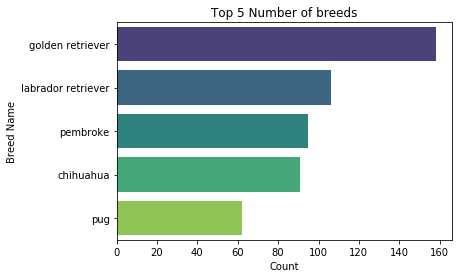

In [659]:
import seaborn as sb
import matplotlib.pyplot as plt

y = final_df['breed'].value_counts().iloc[:5]
x = y.index

sb.barplot(y,x,orient='h',palette='viridis');
plt.title("Top 5 Number of breeds")
plt.xlabel("Count")
plt.ylabel("Breed Name")

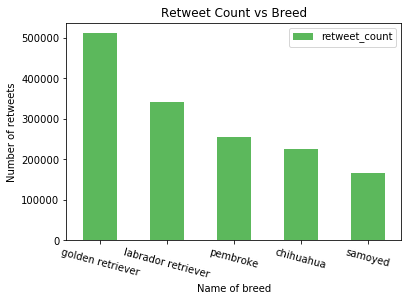

In [688]:
final_df[['breed','retweet_count']].groupby('breed',as_index=True).sum().sort_values(by='retweet_count',ascending=False).iloc[:5].plot(kind="bar",color=['#5cb85c','#5bc0de','#d9534f'])
plt.xticks(rotation=-15)
plt.legend()
plt.ylabel("Number of retweets")
plt.xlabel("Name of breed")
plt.title("Retweet Count vs Breed")
plt.show();

<h1>Conclusion</h1>

**From the above visualizations, golden retriever looks like the most popular breed on the twitter platform**

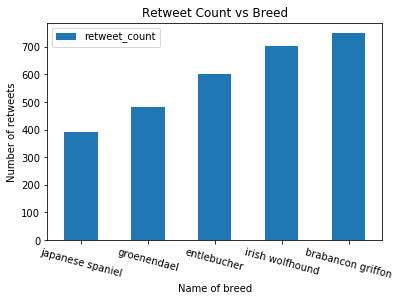

In [685]:
final_df[['breed','retweet_count']].groupby('breed',as_index=True).sum().sort_values(by='retweet_count',ascending=True).iloc[:5].plot(kind="bar")
plt.xticks(rotation=-15)
plt.legend()
plt.ylabel("Number of retweets")
plt.xlabel("Name of breed")
plt.title("Retweet Count vs Breed")
plt.show();

**From the above visualizations, Japanese Spaniel looks like the least popular breed on the twitter platform**

Text(0, 0.5, 'Posts')

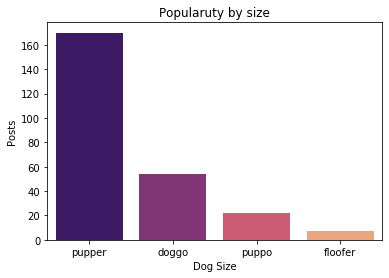

In [693]:
import seaborn as sb
import matplotlib.pyplot as plt

y = final_df['dog_class'].value_counts().iloc[:5]
x = y.index

sb.barplot(x,y,orient='v',palette='magma');
plt.title("Popularuty by size")
plt.xlabel("Dog Size")
plt.ylabel("Posts")

Text(0, 0.5, 'Breed')

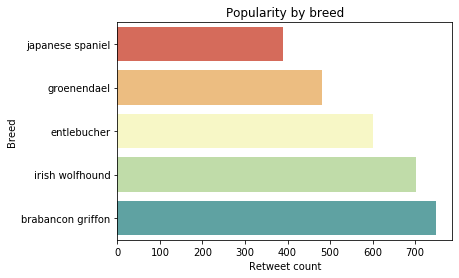

In [704]:
temp_df = final_df[['breed','retweet_count']].groupby('breed',as_index=False).sum().sort_values(by='retweet_count',ascending=True).iloc[:5]

temp_df

x = temp_df['breed']
y = temp_df['retweet_count']

sb.barplot(y,x,orient='h',palette='Spectral');
plt.title("Popularity by breed")
plt.xlabel("Retweet count")
plt.ylabel("Breed")

In [706]:
final_df.query('breed=="japanese spaniel"')

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,retweeted,retweet_count,fav_count,jpg_url,img_num,breed
1261,1318,677301033169788928,2015-12-17 01:35:24+00:00,Twitter for iPhone,This is Juckson. He's totally on his way to a nascar race. 5/10 for Juckson https://t.co/IoLRvF0Kak,https://twitter.com/dog_rates/status/677301033169788928/photo/1,5,10,Juckson,NaN,False,390,1199,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,1,japanese spaniel
